In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data/mediciones.csv')

# Exploracion

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


Vemos que hay diferente tipado en el dataset:

In [4]:
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


# Limpieza

Muchos de ellos deberemos pasarlos directamente a valores numéricos:


En primer lugar muchos números están expresados como cadenas de caracteres y con comas:

In [6]:
df.columns

Index(['distance', 'consume', 'speed', 'temp_inside', 'temp_outside',
       'specials', 'gas_type', 'AC', 'rain', 'sun', 'refill liters',
       'refill gas'],
      dtype='object')

In [7]:
df[['distance', 'consume', 'temp_inside', 'refill liters']] = df[['distance', 'consume', 'temp_inside', 'refill liters']].apply(lambda x: x.str.replace(',','.'))

In [8]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,21.5,12,NaN,E10,0,0,0,45,E10
1,12,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,3.7,39,24.5,18,NaN,SP98,0,0,0,NaN,NaN
384,16.1,4.3,38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,3.8,45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,15.4,4.6,42,25,31,AC,SP98,1,0,0,NaN,NaN


In [9]:
df[['distance', 'consume', 'temp_inside', 'AC', 'rain', 'sun', 'refill liters']] = df[['distance', 'consume', 'temp_inside', 'AC', 'rain', 'sun', 'refill liters']].astype(float)

Tenemos ya nuestras variables numéricas en tipo correcto:

In [10]:
df.dtypes

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC               float64
rain             float64
sun              float64
refill liters    float64
refill gas        object
dtype: object

# Vemos la columna "specials"

In [11]:
df.specials.value_counts()

rain                  32
sun                   27
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
ac rain                1
AC Sun                 1
AC sun                 1
Name: specials, dtype: int64

In [12]:
df[~df.specials.isna()].sample(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
274,25.7,4.9,50,22.0,10,rain,SP98,0.0,1.0,0.0,41.0,SP98
59,12.3,5.7,52,21.5,8,rain,SP98,0.0,1.0,0.0,NaN,NaN
136,23.5,6.0,25,21.5,5,rain,SP98,0.0,1.0,0.0,NaN,NaN
382,13.6,3.7,33,24.5,28,sun,SP98,0.0,0.0,1.0,NaN,NaN
250,31.5,4.1,30,22.5,16,sun,E10,0.0,0.0,1.0,NaN,NaN
140,11.8,4.3,40,21.5,10,rain,E10,0.0,1.0,0.0,NaN,NaN
103,4.9,6.9,25,21.0,12,rain,SP98,0.0,1.0,0.0,NaN,NaN
248,12.3,5.2,57,22.5,15,sun,E10,0.0,0.0,1.0,NaN,NaN
381,5.5,3.7,33,24.5,28,sun,SP98,0.0,0.0,1.0,NaN,NaN
311,10.8,4.7,48,22.0,17,sun,SP98,0.0,0.0,1.0,NaN,NaN


En la columan 'specials' no aparece 'nieve', creamos un dummy para ellos

In [13]:
def nieve(x):
    try:
        if 'SNOW'in x.upper():
            return 1
        else: return 0
    except:
        return 0
        
df['snow']=df.specials.apply(nieve)

# Aunque sólo sea para 4 días:

In [14]:
df.snow.value_counts()

0    384
1      4
Name: snow, dtype: int64

# Podejos "tirar" ya 'specials'
Parece que la columna special está aparentemente bien tabulada en las columnas de dummies correspondientes, así que podemos tirarla ahora que le hemos añadido el valor "nive".

In [15]:
df.drop('specials', axis=1, inplace=True)

In [16]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0


Veamos cuántos datos del repostaje tenemos:

In [17]:
df[~df['refill gas'].isna()]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0
44,5.4,3.3,32,21.5,7,SP98,0.0,0.0,0.0,37.6,SP98,0
82,10.5,3.6,42,20.0,10,SP98,0.0,0.0,0.0,37.7,SP98,0
106,162.7,5.5,75,23.0,1,SP98,0.0,0.0,0.0,45.0,SP98,0
139,16.1,5.4,24,21.5,7,E10,0.0,1.0,0.0,38.0,E10,0
171,44.4,4.8,38,21.5,8,E10,0.0,0.0,0.0,38.3,E10,0
191,43.7,4.7,44,22.0,9,SP98,0.0,1.0,0.0,10.0,SP98,0
192,12.1,4.2,43,22.0,4,SP98,0.0,0.0,0.0,39.0,SP98,0
234,19.0,4.5,29,22.5,10,E10,0.0,0.0,0.0,39.0,E10,0
274,25.7,4.9,50,22.0,10,SP98,0.0,1.0,0.0,41.0,SP98,0


In [18]:
len(df[~df['refill gas'].isna()])

13

In [19]:
df[~df['refill gas'].isna()][['refill gas', 'gas_type']]


,refill gas,gas_type
0,E10,E10
44,SP98,SP98
82,SP98,SP98
106,SP98,SP98
139,E10,E10
171,E10,E10
191,SP98,SP98
192,SP98,SP98
234,E10,E10
274,SP98,SP98


Solo ha apuntado 13 repostajes con sus datos correspondientes. Estos datos podemos decir que se han tomado según las condiciones que nos indican:

"Si el coche no se estaba enfriando lo suficiente como para tener otra medida independiente de la anterior, no lo anoto."


In [20]:
df['cooling']= ~df['refill gas'].isna()


df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,cooling
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0,True
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0,False
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0,False
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0,False
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0,False
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False


# Agrupamos las jornadas

En el data set se diferencia el momento en el que el vehículo ha tenido suficientemente tiempo para enfriarse. Considaremos que entre uno y otro ha habido un cambio de jornada

In [21]:
#Podemos ver el inicio y fin de cada fila de la jornada.
inicio=list(df[df.cooling].index)
fin=inicio[1:]
fin.append(len(df))
inicio=[x+1 for x in inicio]
inicio[0]=0
inicio

[0, 45, 83, 107, 140, 172, 192, 193, 235, 275, 314, 326, 350]

In [22]:
fin

[44, 82, 106, 139, 171, 191, 192, 234, 274, 313, 325, 349, 388]

# Jornada
Damos extraemos la jornada a la que pertemece cada recorrido

In [23]:

 df['jornada']=0
for j, (i,f) in enumerate(zip(inicio,fin)):
    df.loc[i:f,'jornada']=j+1

In [24]:
max_jornadas = df.jornada.max()
df['km_recorridos']=0

for j in range(1,max_jornadas+1):
    df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();

<ipython-input-24-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();
<ipython-input-24-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jornada == j].distance.cumsum();
<ipython-input-24-ce11ab9b0af8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.km_recorridos[df.jornada == j] = df[df.jorn

# Columna Km_recorridos.
Podemos ver como ahora cada viaje tiene una columa más con los  kilómetros acumulados:

In [25]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters,refill gas,snow,cooling,jornada,km_recorridos
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,45.0,E10,0,True,1,28.0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,40.0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,51.2
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,64.1
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,NaN,NaN,0,False,1,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,NaN,NaN,0,False,13,513.4
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False,13,529.5
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,NaN,NaN,0,False,13,545.5
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,NaN,NaN,0,False,13,560.9


Vemos que la columna refill_gas no apota ningún tipo de información .
Algo parecido podemos considerar con refill_liters, no parece que sea de interés cuántos litros ha echado.
Mentenemmos "jornada" para mantener a qué jornada pertenece cada trayecto


In [26]:
df.drop('refill liters', axis=1, inplace=True)
df.drop('refill gas', axis=1, inplace=True)
df.drop('cooling', axis=1, inplace=True)



In [27]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow,jornada,km_recorridos
0,28.0,5.0,26,21.5,12,E10,0.0,0.0,0.0,0,1,28.0
1,12.0,4.2,30,21.5,13,E10,0.0,0.0,0.0,0,1,40.0
2,11.2,5.5,38,21.5,15,E10,0.0,0.0,0.0,0,1,51.2
3,12.9,3.9,36,21.5,14,E10,0.0,0.0,0.0,0,1,64.1
4,18.5,4.5,46,21.5,15,E10,0.0,0.0,0.0,0,1,82.6
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,SP98,0.0,0.0,0.0,0,13,513.4
384,16.1,4.3,38,25.0,31,SP98,1.0,0.0,0.0,0,13,529.5
385,16.0,3.8,45,25.0,19,SP98,0.0,0.0,0.0,0,13,545.5
386,15.4,4.6,42,25.0,31,SP98,1.0,0.0,0.0,0,13,560.9


Veamos algunas gráficas que nos ayuden a entender la inforamción

# Graficas

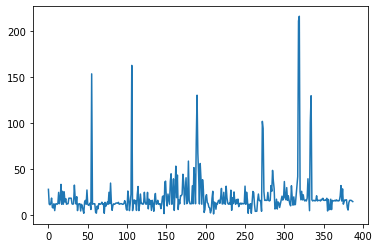

In [28]:
df.distance.plot();

Vemos que hay 6 tramos en los que dice haber recorrido entre 100 y 200 km, mientras que el resto está, generalmente en distancia no mayores de 50km

Si observamos los kilémetros recorridos por jornada tendremos un diente de sierra:

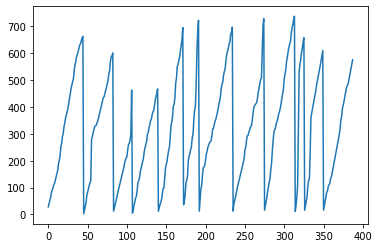

In [67]:
df.km_recorridos.plot();

el valor intermedio de recorridos ha sido corto:

In [29]:
df.distance.median()

14.6

<AxesSubplot:>

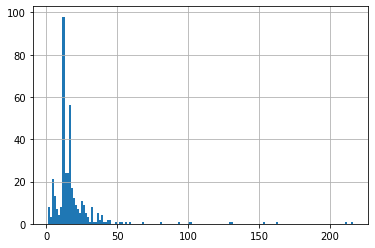

In [30]:
df.distance.hist(bins=150)

Veamos una primera aproximación agrupando los datos por combustibles:

In [31]:
df.groupby('gas_type').sum()['distance']

gas_type
E10     3375.4
SP98    4249.9
Name: distance, dtype: float64

Se ha recorrido mucha más distancia con SP98

Veamos la media de consumo agrupado por combustibles:

In [32]:
df.groupby('gas_type').mean()['consume']

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

In [33]:
df.groupby('gas_type').median()['consume']

gas_type
E10     4.8
SP98    4.7
Name: consume, dtype: float64

La verdad es que aparentemente ambos combustibles en valores promedio varian muy poco.

Sabemos que:

E10 cuesta 1,38€
SP98cu  cuesta 1,46€

¿Seríamos capaces de, grosso modo, averiguar cuánto nos ha salido de meedia con uno y otro combustible?

In [34]:
def pon_precio(x, dicci):
    try:
        return dicci[x]
    except:
        return None

In [35]:
precio_litro= {'E10':1.38, 'SP98':1.46}

In [36]:
df['price_fuel'] = df['gas_type'].apply(lambda x: pon_precio(x, precio_litro) )

Podemos la información de €/kilometro de cada trayecto yu el coste de cada trayecto:

La velocidad media es de:

In [37]:
round(df.speed.mean(),0)

42.0

Con una desviación estándar de 

In [38]:
round(df.speed.std(),1)


13.6

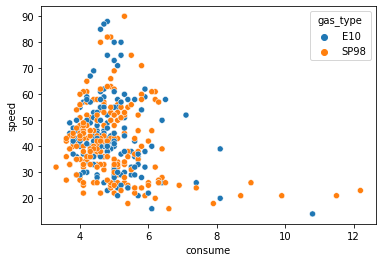

In [39]:
sns.scatterplot(data=df, x='consume', y='speed', hue='gas_type');


El consumo, con aire acondicionado sube:

In [40]:
df.groupby('AC').mean()['consume']

AC
0.0    4.883520
1.0    5.256667
Name: consume, dtype: float64

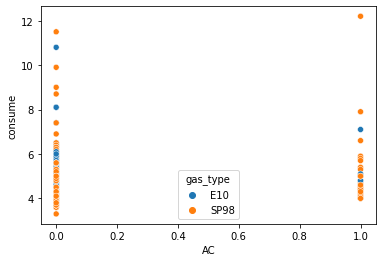

In [41]:
sns.scatterplot(data=df, x='AC', y='consume', hue='gas_type');


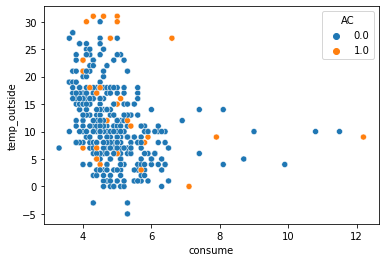

In [42]:
sns.scatterplot(data=df, x='consume', y='temp_outside', hue='AC');


Podríamos pensar que el consumo a velocidades altas iba a ser mucho mayor, pero ocurre que los consumos más altas son con las velocidaddes medias más bajas

In [43]:
df['euros_km'] = df.apply(lambda row: row['consume']*row['price_fuel'], axis=1)
df['cost_trip'] = df.apply(lambda row: row['euros_km']*row['distance'], axis=1)

In [44]:
df.groupby('gas_type').mean()['euros_km']

gas_type
E10     6.805125
SP98    7.152719
Name: euros_km, dtype: float64

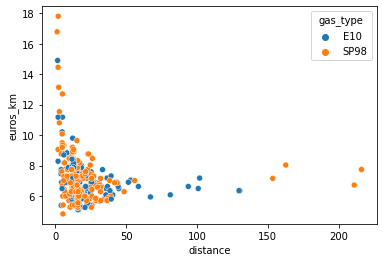

In [45]:
sns.scatterplot(data=df, x='distance', y='euros_km', hue='gas_type');


In [46]:
df_cortas=df[df.distance<=50]
df_largas=df[df.distance<50]



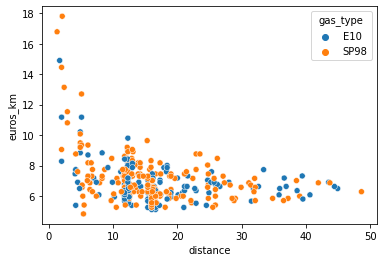

In [47]:
sns.scatterplot(data=df_cortas, x='distance', y='euros_km', hue='gas_type');


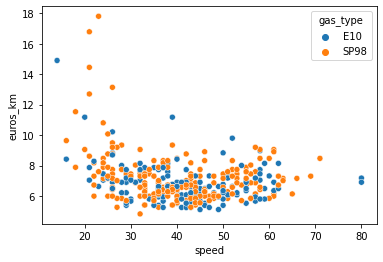

In [48]:
sns.scatterplot(data=df_cortas, x='speed', y='euros_km', hue='gas_type');


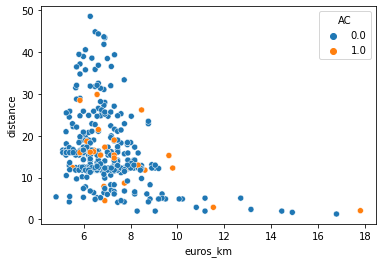

In [49]:
sns.scatterplot(data=df_cortas, x='euros_km', y='distance', hue='AC');


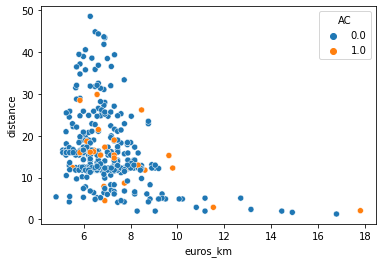

In [50]:
sns.scatterplot(data=df_largas, x='euros_km', y='distance', hue='AC');


In [51]:
df['dif_int_ext'] = df.apply(lambda row: row['temp_inside'] - row['temp_outside'], axis=1)

In [52]:
df[df.AC == 1.0]

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,snow,jornada,km_recorridos,price_fuel,euros_km,cost_trip,dif_int_ext
40,12.4,4.0,55,21.5,7,E10,1.0,1.0,0.0,0,1,630.5,1.38,5.520,68.4480,14.5
41,4.5,5.0,29,21.5,7,E10,1.0,0.0,0.0,0,1,635.0,1.38,6.900,31.0500,14.5
60,2.9,7.9,18,21.5,9,SP98,1.0,1.0,0.0,0,2,329.7,1.46,11.534,33.4486,12.5
61,2.1,12.2,23,21.5,9,SP98,1.0,1.0,0.0,0,2,331.8,1.46,17.812,37.4052,12.5
69,11.8,4.5,37,21.5,4,SP98,1.0,0.0,0.0,0,2,423.1,1.46,6.570,77.5260,17.5
94,11.8,5.9,21,20.0,9,SP98,1.0,1.0,0.0,0,3,150.1,1.46,8.614,101.6452,11.0
101,26.2,5.8,71,21.0,8,SP98,1.0,1.0,0.0,0,3,240.9,1.46,8.468,221.8616,13.0
104,12.4,5.4,18,21.0,11,SP98,1.0,1.0,0.0,0,3,277.0,1.46,7.884,97.7616,10.0
153,17.3,5.0,61,21.5,6,E10,1.0,1.0,0.0,0,5,237.6,1.38,6.900,119.3700,15.5
181,12.3,7.1,52,22.5,0,E10,1.0,1.0,0.0,1,6,240.4,1.38,9.798,120.5154,22.5


In [53]:
def tipo_combus(x):
    try:
        if x=='SP98':
            return 1
        elif x=='E10':
            return 0
        else:
            return 
    except:
        return 

df.gas_type = df.gas_type.apply(tipo_combus)

In [54]:
df.snow.value_counts()

0    384
1      4
Name: snow, dtype: int64

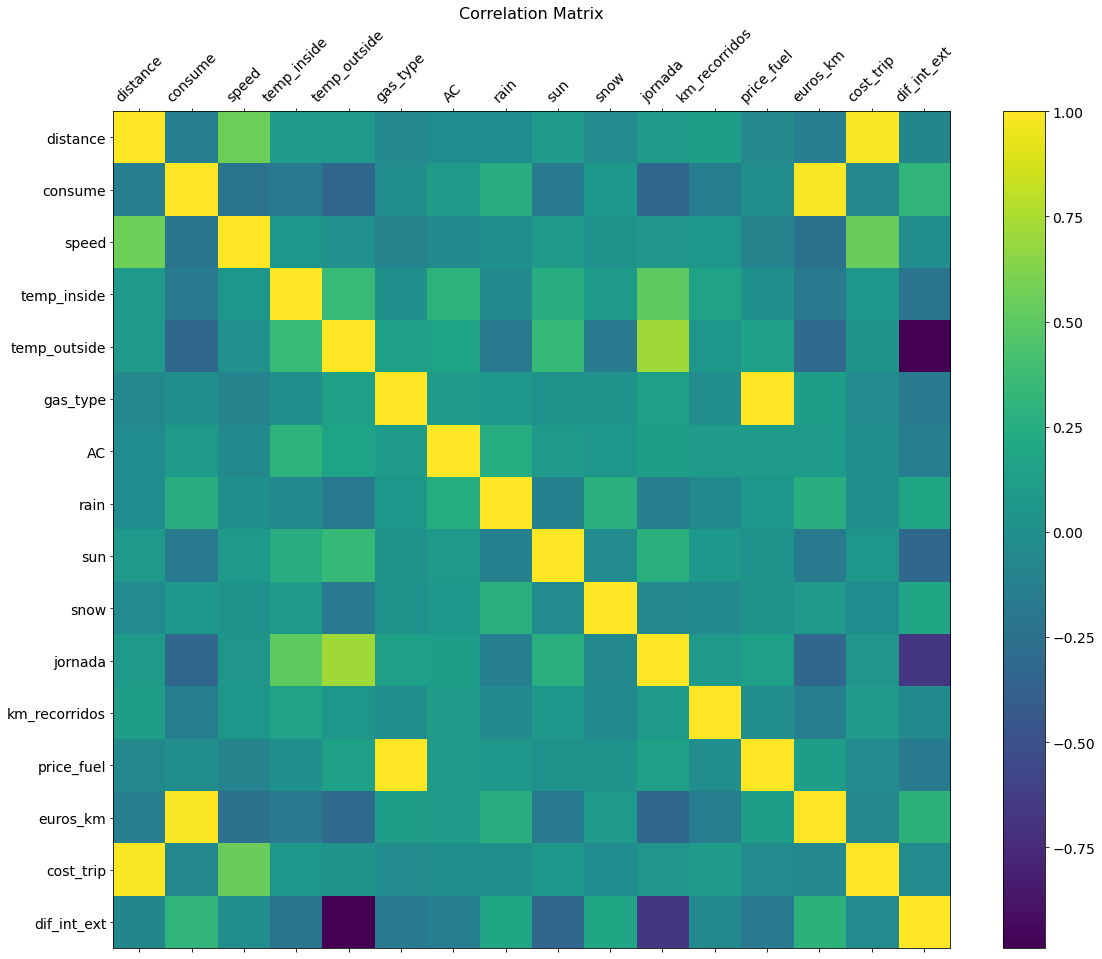

In [55]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.astype(float).corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

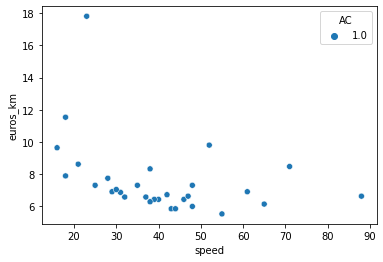

In [56]:
sns.scatterplot(data=df[df.AC == 1], x='speed', y='euros_km', hue='AC');


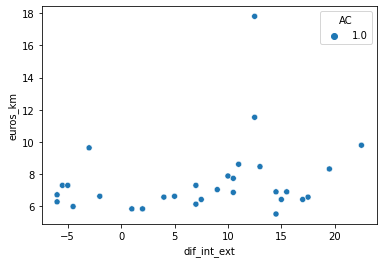

In [57]:
sns.scatterplot(data=df[df.AC == 1], x='dif_int_ext', y='euros_km', hue='AC');


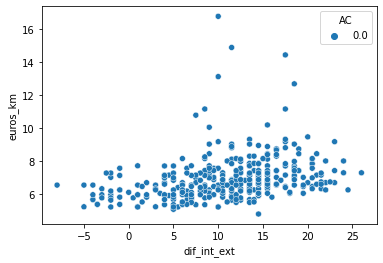

In [58]:
sns.scatterplot(data=df[df.AC == 0], x='dif_int_ext', y='euros_km', hue='AC');


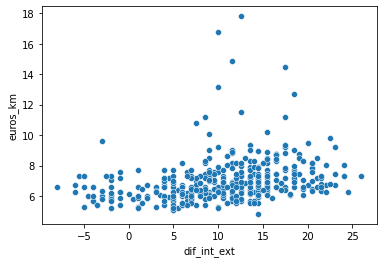

In [59]:
sns.scatterplot(data=df, x='dif_int_ext', y='euros_km');


In [60]:
df[['euros_km','dif_int_ext']].corr()

,euros_km,dif_int_ext
euros_km,1.000000,0.285161
dif_int_ext,0.285161,1.000000
